### importacion de librerias necesarias

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Extraer los datos 

In [31]:
df = pd.read_json('../data/MLA_100k.jsonlines', lines=True)

In [32]:
df.head()

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

In [34]:
df.columns

Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')

### Análisis detallado de la variable objetivo (condition)

In [35]:
print("Distribución de la variable 'condition':")
condition_counts = df['condition'].value_counts(normalize=True)
print(condition_counts)

Distribución de la variable 'condition':
condition
new     0.53758
used    0.46242
Name: proportion, dtype: float64


Observaciones:
- La variable 'condition' indica si un producto es nuevo ('new') o usado ('used').
- Proporción de clases: {'new': 0.53758, 'used': 0.46242}

### Análisis de Valores Faltantes 

In [36]:
missing = df.isnull().sum()
missing_percent = missing / len(df) * 100
missing_df = pd.DataFrame({'Valores Faltantes': missing, 'Porcentaje (%)': missing_percent})
print("Columnas con valores faltantes:")
print(missing_df[missing_df['Valores Faltantes'] > 0])

Columnas con valores faltantes:
                      Valores Faltantes  Porcentaje (%)
warranty                          60896          60.896
seller_contact                    97781          97.781
parent_item_id                    23011          23.011
official_store_id                 99182          99.182
differential_pricing             100000         100.000
original_price                    99857          99.857
video_id                          97015          97.015
catalog_product_id                99989          99.989
subtitle                         100000         100.000


Decisiones sobre valores faltantes:
- Columnas con >90% de valores faltantes (differential_pricing, subtitle, catalog_product_id, original_price, official_store_id): Eliminar.
- warranty (39% no nulos): Imputar con 'No warranty' y crear variable binaria 'has_warranty'. Pero para esto vamos a revisar la variable "Warranty"
- seller_contact, video_id: Eliminar debido a baja completitud (<3%).
- parent_item_id (77% no nulos): Eliminar, ya que no es crítico para predecir 'condition'.

#### Variable Warranty

In [37]:
print(df['warranty'].value_counts())
df['warranty'].nunique()

warranty
Sí                                                                       5682
Sin garantía                                                             5442
SI                                                                        592
6 meses                                                                   547
6 MESES                                                                   397
                                                                         ... 
Garantía de un año a partir de la fecha de entrega!                         1
Garantía 1 año. La misma no incluye daños por mal uso o accidentales.       1
SE PRUEBAN LOS JUEGOS AL RETIRAR                                            1
Mi garantía son los comentarios de mis compradores.                         1
Pueden variar matasellos                                                    1
Name: count, Length: 10264, dtype: int64


10264

Esto confirma que warranty:

- Está llena de texto libre.

- Tiene mucho ruido (textos promocionales, subjetivos, informales).

- No hay una estructura confiable para usarla directamente.

Dado su ruido y ambigüedad, no va a aportar señal clara al modelo y puede hasta introducir error o sobreajuste, por lo que es mejor elminarla. 

### Aplanamiento de Datos Anidados y Características Derivadas

In [38]:
# Extraer número de métodos de pago no-MercadoPago
def extract_num_payment_methods(methods):
    return len(methods) if isinstance(methods, list) else 0

# Extraer flags de envío
def extract_free_shipping(shipping):
    return shipping.get('free_shipping', False)

def extract_local_pick_up(shipping):
    return shipping.get('local_pick_up', False)

def extract_num_pictures(pictures):
    try:
        pics = eval(pictures) if isinstance(pictures, str) and pictures != 'Unknown' else []
        return len(pics) if isinstance(pics, list) else 0
    except:
        return 0

# Aplicar funciones
df['free_shipping'] = df['shipping'].apply(extract_free_shipping)
df['local_pick_up'] = df['shipping'].apply(extract_local_pick_up)
df['num_payment_methods'] = df['non_mercado_pago_payment_methods'].apply(extract_num_payment_methods)
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['num_pictures'] = df['pictures'].apply(extract_num_pictures)
df['sales_ratio'] = (df['initial_quantity'] - df['available_quantity']) / df['initial_quantity'].replace(0, 1)


Nuevas características:
- free_shipping, local_pick_up: Extraídas de shipping.
- num_payment_methods: Número de métodos de pago alternativos.
- title_length: Longitud del título.
- sales_ratio: Proporción de ventas.
- num_pictures: Número de imágenes.


### Manejo de Redundancias y Outliers

In [39]:
# Eliminar initial_quantity, available_quantity y base_price
if 'base_price' in df.columns:
    df = df.drop(columns=['base_price'])
    print("- Eliminado base_price (redundante).")

# Validar price en ARS
min_price_threshold = 10
print(f"- Filtrando precios < {min_price_threshold} ARS (valores irrealmente bajos).")
df = df[df['price'] >= min_price_threshold]

# Manejo de outliers basados en percentil 99
numeric_cols = ['price', 'title_length', 'sales_ratio']
for col in ['price', 'sales_ratio']:
    p99 = df[col].quantile(0.99)
    df = df[df[col] <= p99]
print(f"Número de registros después de eliminar outliers y filtrar precios bajos: {len(df)}")

# Verificar si se eliminaron demasiados datos
if len(df) < 0.9 * 100000:
    print("- Advertencia: Se eliminó más del 10% de los datos. Considerar ajustar percentiles o umbrales.")

- Eliminado base_price (redundante).
- Filtrando precios < 10 ARS (valores irrealmente bajos).
Número de registros después de eliminar outliers y filtrar precios bajos: 97848


### Análisis de Características Numéricas

In [40]:
numeric_cols = ['price', 'sold_quantity', 'sales_ratio', 'num_payment_methods']
print("Estadísticas de variables numéricas:")
print(df[numeric_cols].describe())

Estadísticas de variables numéricas:
               price  sold_quantity   sales_ratio  num_payment_methods
count   97848.000000   97848.000000  97848.000000         97848.000000
mean     1908.957201       1.872895      0.008638             1.596732
std      8788.410306      38.739251      0.053913             1.409677
min        10.000000       0.000000      0.000000             0.000000
25%        90.000000       0.000000      0.000000             0.000000
50%       250.000000       0.000000      0.000000             2.000000
75%       799.000000       0.000000      0.000000             3.000000
max    130000.000000    8676.000000      0.500000            12.000000


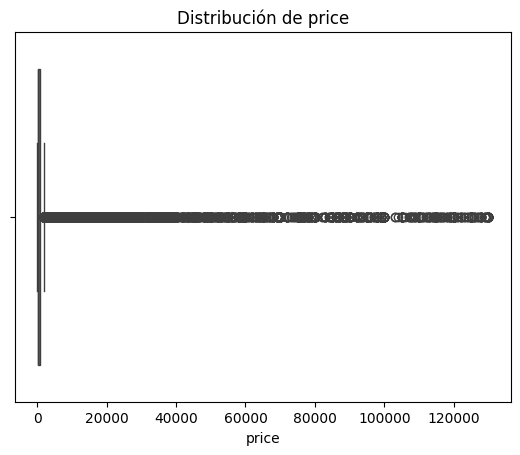

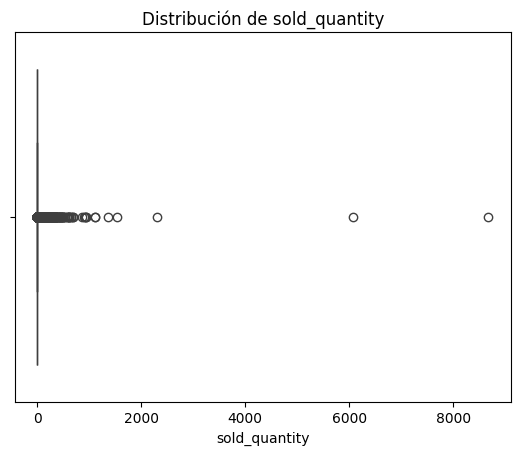

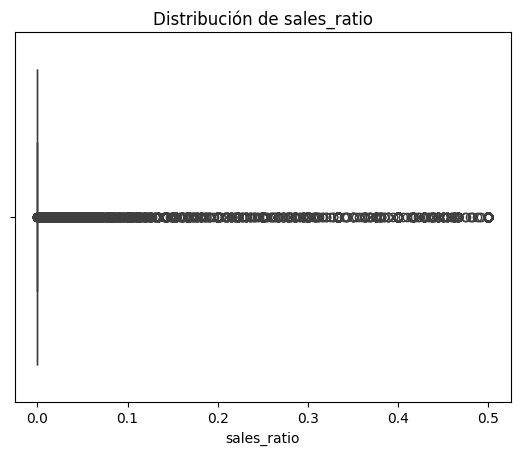

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['price', 'sold_quantity', 'sales_ratio']
for col in features_to_plot:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.show()


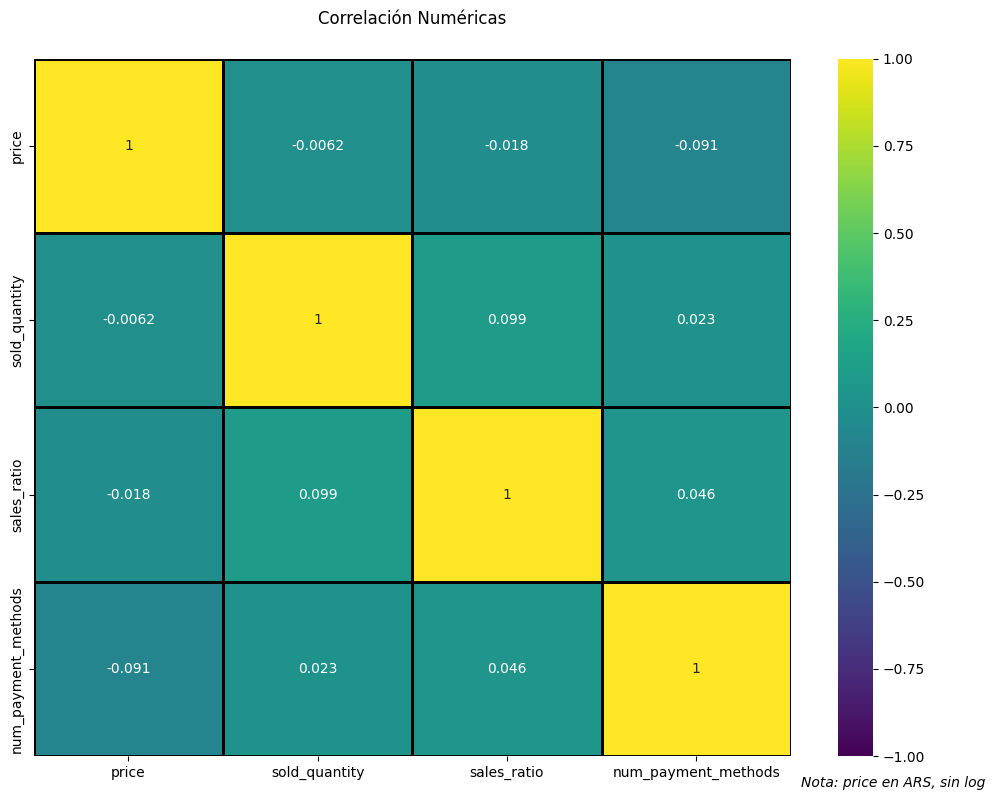

In [42]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, linewidths=1, linecolor='black')
plt.title('Correlación Numéricas', pad=25)
sns.despine(left=True, bottom=True)
plt.figtext(0.99, 0.01, 'Nota: price en ARS, sin log', 
            ha='right', fontsize=10, style='italic')
plt.tight_layout()


### Análisis Categórico

In [43]:
categorical_cols = ['category_id', 'listing_type_id', 'buying_mode', 'currency_id', 'status']
for col in categorical_cols:
    if col in df.columns:
        print(f"\nDistribución de {col}:")
        print(df[col].value_counts(normalize=True).head(10))
        if len(df[col].unique()) == 1:
            print(f"- Advertencia: {col} constante. Se eliminará.")



Distribución de category_id:
category_id
MLA1227     0.046889
MLA2044     0.019929
MLA41287    0.009525
MLA3530     0.007369
MLA2038     0.006796
MLA15171    0.005917
MLA15328    0.004865
MLA1383     0.004599
MLA41269    0.004527
MLA15204    0.004446
Name: proportion, dtype: float64

Distribución de listing_type_id:
listing_type_id
bronze          0.641505
free            0.216387
silver          0.084325
gold_special    0.030578
gold            0.020818
gold_premium    0.006203
gold_pro        0.000184
Name: proportion, dtype: float64

Distribución de buying_mode:
buying_mode
buy_it_now    0.979478
classified    0.012938
auction       0.007583
Name: proportion, dtype: float64

Distribución de currency_id:
currency_id
ARS    0.996679
USD    0.003321
Name: proportion, dtype: float64

Distribución de status:
status
active            0.957393
paused            0.042413
closed            0.000184
not_yet_active    0.000010
Name: proportion, dtype: float64


In [44]:

# Eliminamos las filas donde 'status' sea 'closed' o 'not_yet_active'
df = df[~df['status'].isin(['closed', 'not_yet_active'])]

# Mostrar el DataFrame filtrado
print(df)


                                          seller_address  \
0      {'comment': '', 'longitude': -58.3986709, 'id'...   
1      {'comment': '', 'longitude': -58.5059173, 'id'...   
2      {'comment': '', 'longitude': -58.4143948, 'id'...   
3      {'comment': '', 'longitude': -58.4929208, 'id'...   
4      {'comment': '', 'longitude': -58.5495042, 'id'...   
...                                                  ...   
99995  {'comment': '', 'longitude': -58.6142895, 'id'...   
99996  {'comment': '', 'longitude': '', 'id': 1114571...   
99997  {'comment': '', 'longitude': -58.6241199, 'id'...   
99998  {'comment': '', 'longitude': -58.4020374, 'id'...   
99999  {'comment': '', 'longitude': -58.3713681, 'id'...   

                                                warranty sub_status condition  \
0                                                   None         []       new   
1                                     NUESTRA REPUTACION         []      used   
2                                   

### Analisís booleano

In [45]:
boolean_cols = ['accepts_mercadopago', 'automatic_relist', 'free_shipping', 'local_pick_up']
for col in boolean_cols:
    if col in df.columns:
        print(f"\nDistribución de {col}:")
        print(df[col].value_counts(normalize=True))
        if len(df[col].unique()) == 1:
            print(f"- Advertencia: {col} constante. Se eliminará.")


Distribución de accepts_mercadopago:
accepts_mercadopago
True     0.987059
False    0.012941
Name: proportion, dtype: float64

Distribución de automatic_relist:
automatic_relist
False    0.953194
True     0.046806
Name: proportion, dtype: float64

Distribución de free_shipping:
free_shipping
False    0.970101
True     0.029899
Name: proportion, dtype: float64

Distribución de local_pick_up:
local_pick_up
True     0.802533
False    0.197467
Name: proportion, dtype: float64


### Transformaciones

#### Eliminar columnas

In [46]:
columns_to_drop = [
    'id', 'permalink', 'thumbnail', 'secure_thumbnail', 'descriptions', 'listing_source',
    'international_delivery_mode', 'last_updated', 'differential_pricing',
    'subtitle', 'catalog_product_id', 'original_price', 'official_store_id',
    'seller_contact', 'video_id', 'seller_address', 'shipping', 'non_mercado_pago_payment_methods',
    'attributes', 'variations', 'deal_ids', 'sub_status', 'coverage_areas', 'geolocation',
    'parent_item_id', 'pictures', 'tags', 'location', 'date_created', 'start_time', 'stop_time',
    'warranty', 'seller_id', 'site_id', 'currency_id', 'accepts_mercadopago', 'category_id'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
print("Columnas eliminadas:", columns_to_drop)



Columnas eliminadas: ['id', 'permalink', 'thumbnail', 'secure_thumbnail', 'descriptions', 'listing_source', 'international_delivery_mode', 'last_updated', 'differential_pricing', 'subtitle', 'catalog_product_id', 'original_price', 'official_store_id', 'seller_contact', 'video_id', 'seller_address', 'shipping', 'non_mercado_pago_payment_methods', 'attributes', 'variations', 'deal_ids', 'sub_status', 'coverage_areas', 'geolocation', 'parent_item_id', 'pictures', 'tags', 'location', 'date_created', 'start_time', 'stop_time', 'warranty', 'seller_id', 'site_id', 'currency_id', 'accepts_mercadopago', 'category_id']


In [47]:
df.columns

Index(['condition', 'listing_type_id', 'price', 'buying_mode', 'title',
       'automatic_relist', 'status', 'initial_quantity', 'sold_quantity',
       'available_quantity', 'free_shipping', 'local_pick_up',
       'num_payment_methods', 'title_length', 'num_pictures', 'sales_ratio'],
      dtype='object')

In [48]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(97829, 16)
(97251, 16)


In [49]:
df = df.drop(columns=["title"])

#### Codificar categóricas con One-Hot Encoding

In [50]:
categorical_cols = ['listing_type_id', 'buying_mode', 'status']
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col in df.columns], 
                    prefix=['listing', 'buying', 'status'])
print("Categóricas codificadas con One-Hot Encoding:", categorical_cols)

Categóricas codificadas con One-Hot Encoding: ['listing_type_id', 'buying_mode', 'status']


#### Codificar booleanas

In [51]:
# Identificar todas las columnas booleanas
boolean_cols = df.select_dtypes(include='bool').columns.tolist()

# Convertirlas a enteros (0 y 1)
df[boolean_cols] = df[boolean_cols].astype(int)

print("Booleanas codificadas a enteros (1/0):", boolean_cols)


Booleanas codificadas a enteros (1/0): ['automatic_relist', 'free_shipping', 'local_pick_up', 'listing_bronze', 'listing_free', 'listing_gold', 'listing_gold_premium', 'listing_gold_pro', 'listing_gold_special', 'listing_silver', 'buying_auction', 'buying_buy_it_now', 'buying_classified', 'status_active', 'status_paused']


#### Codificar objetivo

In [52]:
df['condition'] = df['condition'].map({'used': 0, 'new': 1})
print("Objetivo: used=0, new=1.")

Objetivo: used=0, new=1.


#### Verificar el dataset

In [53]:
df.head()

,condition,price,automatic_relist,initial_quantity,sold_quantity,available_quantity,free_shipping,local_pick_up,num_payment_methods,title_length,...,listing_gold,listing_gold_premium,listing_gold_pro,listing_gold_special,listing_silver,buying_auction,buying_buy_it_now,buying_classified,status_active,status_paused
0,1,80.0,0,1,0,1,0,1,3,60,...,0,0,0,0,0,0,1,0,1,0
1,0,2650.0,0,1,0,1,0,1,2,57,...,0,0,0,0,1,0,1,0,1,0
2,0,60.0,0,1,0,1,0,1,3,43,...,0,0,0,0,0,0,1,0,1,0
3,1,580.0,0,1,0,1,0,1,3,52,...,0,0,0,0,1,0,1,0,1,0
4,0,30.0,0,1,0,1,0,1,3,25,...,0,0,0,0,0,0,1,0,1,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97251 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   condition             97251 non-null  int64  
 1   price                 97251 non-null  float64
 2   automatic_relist      97251 non-null  int32  
 3   initial_quantity      97251 non-null  int64  
 4   sold_quantity         97251 non-null  int64  
 5   available_quantity    97251 non-null  int64  
 6   free_shipping         97251 non-null  int32  
 7   local_pick_up         97251 non-null  int32  
 8   num_payment_methods   97251 non-null  int64  
 9   title_length          97251 non-null  int64  
 10  num_pictures          97251 non-null  int64  
 11  sales_ratio           97251 non-null  float64
 12  listing_bronze        97251 non-null  int32  
 13  listing_free          97251 non-null  int32  
 14  listing_gold          97251 non-null  int32  
 15  listing_gold_premium  97

In [55]:
df.to_csv('../data/clean_dataset.csv', index=False)
print("\nGuardado en 'data/clean_dataset.csv'")


Guardado en 'data/clean_dataset.csv'
